In [92]:
!ls logs/w2s0/

joint  reweight20  reweight40  subsample20  tau_norm20


In [90]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os, sys, json, argparse, itertools
import pickle
import matplotlib.ticker as ticker

widths = [2]
# epochs = [25,50,75,100]
# widths=[16]
epochs=[20,40,60,80]
reweight_log_dirs = [f'logs/w{width}s0/reweight{epoch}' for width, epoch in itertools.product(widths, epochs)]
subsample_log_dirs = [f'logs/w{width}s0/subsample{epoch}' for width, epoch in itertools.product(widths, epochs)]
jointtrain_log_dirs = [f'logs/w{width}s0/joint' for width, epoch in itertools.product(widths, epochs)]
taunorm_log_dirs = [f'logs/w{width}s0/tau_norm{epoch}' for width, epoch in itertools.product(widths, epochs)]


def add_embelishments(ax, steps):
    """
    Add cool grids and stuff to graph
    """
    ax.legend()
    resolution='%0.2f'
    start, end = ax.get_ylim()
    step=((end-start)/steps)
    end=min(end,1.0)
    ax.yaxis.set_ticks(np.arange(start,end,step))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(resolution))
    extraticks=[]
    ax.axhline(0.9, linestyle='--', color='b')
    ax.set_yticks(list(ax.get_yticks())+ extraticks)
    ax.grid()
    
def plot_accuracies(rundir, name=None, axs=None, steps=10):
    splits = ['train','val']
    if axs is None:
        fig, ax = plt.subplots() 
    else:
        ax = axs
    for split in splits:
        print(f"Processing {rundir}")
        if not os.path.exists(rundir):
            print(f"Not found {rundir}")

        log_path = os.path.join(rundir, f'{split}.csv')
        if not os.path.exists(log_path):
            print(f'{log_path} not found')

        df = pd.read_csv(log_path)
        ax.plot(df['epoch'], df['total_acc'], label=f'{split} total_acc')
#         ax.plot(df['epoch'], df['split_acc'], label=f'{split} split_acc')
        ax.plot(df['epoch'], df['total_acc:g3'], label=f'{split} worst_group_acc')
    ax.set(xlabel='Epoch', ylabel='Accuracy',
       title=('Accuracies' if name is None else name))
    add_embelishments(ax,steps)
    return ax

def plot_all_accs(rundir, name=None, axs=None, xlabel=None, split='val', steps=10):
    if axs is None:
        fig, ax = plt.subplots() 
    else:
        ax = axs
        
    print(f"Processing {rundir}")
    if not os.path.exists(rundir):
        print(f"Not found {rundir}")

    log_path = os.path.join(rundir, f'{split}.csv')
    if not os.path.exists(log_path):
        print(f'{log_path} not found')

    df = pd.read_csv(log_path)
    for g in range(4):
        ax.plot(df['epoch'], df[f'total_acc:g{g}'], label=f'{split} group {g} accuracy')
    
    ax.plot(df['epoch'], df['total_acc'], label=f'{split} average accuracy')
    ax.set(xlabel=('Epoch' if xlabel is None else xlabel), ylabel='Accuracy',
       title=('Accuracy over epochs' if name is None else name))
    add_embelishments(ax,steps)
    return ax    


def plot_margins(rundir, name=None, axs=None):
    splits = ['train','val']
    if axs is None:
        fig, ax = plt.subplots() 
    else:
        ax = axs
    for split in splits:
        print(f"Processing {rundir}")
        if not os.path.exists(rundir):
            print(f"Not found {rundir}")

        log_path = os.path.join(rundir, f'{split}.csv')
        if not os.path.exists(log_path):
            print(f'{log_path} not found')

        df = pd.read_csv(log_path)
        ax.plot(df['epoch'], df['avg_margin'], label=f'{split} avg_margin')
        ax.plot(df['epoch'], df['group3_margin'], label=f'{split} worst_group_margin')
    ax.set(xlabel='Epoch', ylabel='Margin',
       title=('Margins over epochs' if name is None else name))
    ax.legend()
    ax.grid()
    return ax


def plot_all_margins(rundir, name=None, axs=None, xlabel=None, split='val'):
    if axs is None:
        fig, ax = plt.subplots() 
    else:
        ax = axs
        
    print(f"Processing {rundir}")
    if not os.path.exists(rundir):
        print(f"Not found {rundir}")

    log_path = os.path.join(rundir, f'{split}.csv')
    if not os.path.exists(log_path):
        print(f'{log_path} not found')

    df = pd.read_csv(log_path)
    for g in range(4):
        ax.plot(df['epoch'], df[f'group{g}_margin'], label=f'{split} group {g} margin')
    
    ax.plot(df['epoch'], df['avg_margin'], label=f'{split} average margin')
    ax.set(xlabel=('Epoch' if xlabel is None else xlabel), ylabel='Margin',
       title=('Margin over epochs' if name is None else name))
    ax.legend()
#     start, end = ax.get_ylim()
#     print(f'start: {start} and end={end}')
#     ax.yaxis.set_ticks(np.arange(start,end,step))
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.grid()
    return ax    
    
keys = ['epoch', 'total_acc', 'group0_acc', 'group1_acc', 'group2_acc',
        'group3_acc', 'split_acc', 'loss', 'avg_margin', 'group0_margin',
        'group1_margin', 'group2_margin', 'group3_margin', 'total_acc:g0', 'total_acc:g1',
        'total_acc:g2', 'total_acc:g3']

## Plot methods for total and worst group

Processing logs/w2s0/joint
Processing logs/w2s0/joint
Processing logs/w2s0/joint
Processing logs/w2s0/joint
Processing logs/w2s0/reweight20
Processing logs/w2s0/reweight20
Processing logs/w2s0/reweight20
Processing logs/w2s0/reweight20
Processing logs/w2s0/subsample20
Processing logs/w2s0/subsample20
Processing logs/w2s0/subsample20
Processing logs/w2s0/subsample20
Processing logs/w2s0/tau_norm20
Processing logs/w2s0/tau_norm20


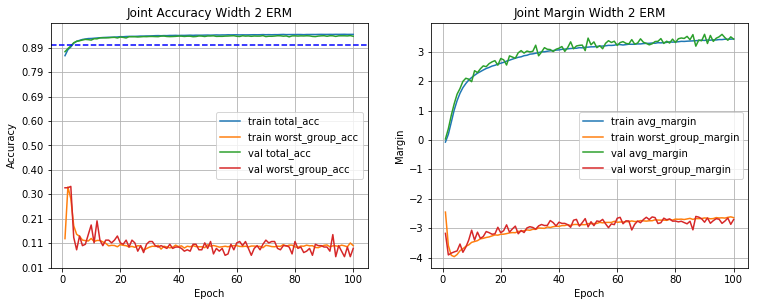

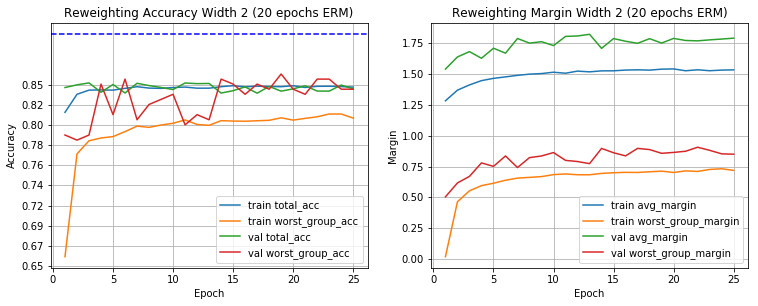

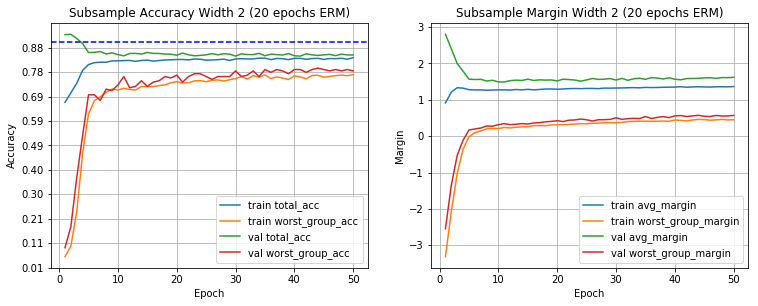

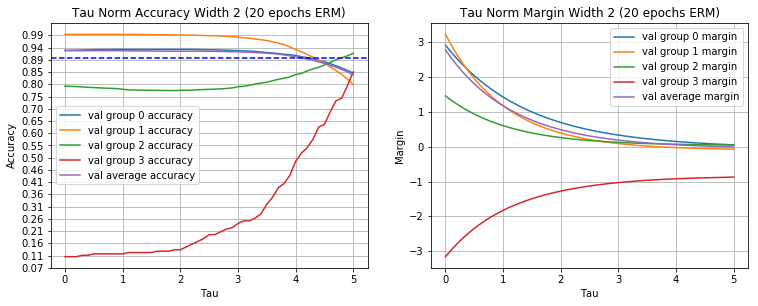

In [91]:
idx = 0
width = 2
e = epochs[idx]

fig0, (ax, ax0) = plt.subplots(1,2)
fig0.set_size_inches(12.5, 4.5)
plot_accuracies(jointtrain_log_dirs[idx], f'Joint Accuracy Width {width} ERM', ax)
plot_margins(jointtrain_log_dirs[idx], f'Joint Margin Width {width} ERM', ax0)


fig1, (ax1, ax2) = plt.subplots(1,2)
fig1.set_size_inches(12.5, 4.5)
plot_accuracies(reweight_log_dirs[idx], f'Reweighting Accuracy Width {width} ({e} epochs ERM)', ax1)
plot_margins(reweight_log_dirs[idx], f'Reweighting Margin Width {width} ({e} epochs ERM)', ax2)



fig2, (ax3, ax4) = plt.subplots(1,2)
fig2.set_size_inches(12.5, 4.5)
plot_accuracies(subsample_log_dirs[idx], f'Subsample Accuracy Width {width} ({e} epochs ERM)', ax3)
plot_margins(subsample_log_dirs[idx], f'Subsample Margin Width {width} ({e} epochs ERM)', ax4)


fig3, (ax4, ax5) = plt.subplots(1,2)
fig3.set_size_inches(12.5, 4.5)
plot_all_accs(taunorm_log_dirs[idx], name=f'Tau Norm Accuracy Width {width} ({e} epochs ERM)', xlabel='Tau', axs=ax4, steps=20)
plot_all_margins(taunorm_log_dirs[idx], name=f'Tau Norm Margin Width {width} ({e} epochs ERM)', xlabel='Tau', axs=ax5)

Processing logs/w16s0/tau_norm20
Processing logs/w16s0/tau_norm20
start: -2.912405 and end=5.760105


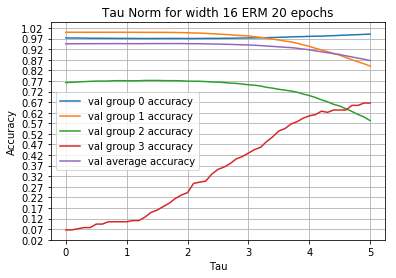

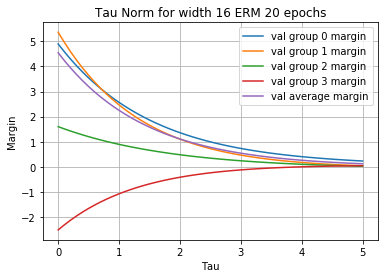

In [45]:
plot_all_accs(taunorm_log_dirs[0], name=f'Tau Norm for width 16 ERM 20 epochs', xlabel='Tau')
plot_all_margins(taunorm_log_dirs[0], name=f'Tau Norm for width 16 ERM 20 epochs', xlabel='Tau', step=0.1)

Processing w50_seed0_log
Processing w50_seed0_log


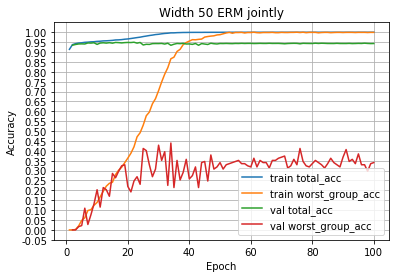

In [86]:
ax = plot_accuracies(jointtrain_log_dirs[1], 'Width 50 ERM jointly')